# 인공신경망 실습

1.   단층 퍼셉트론 (Single-layer Perceptron)
2.   다층 퍼셉트론 (Multi-layer Perceptron)

---


In [1]:
import numpy as np

##1. 단층 퍼셉트론 (Single-layer Perceptron)


순전파 (Feedforward)

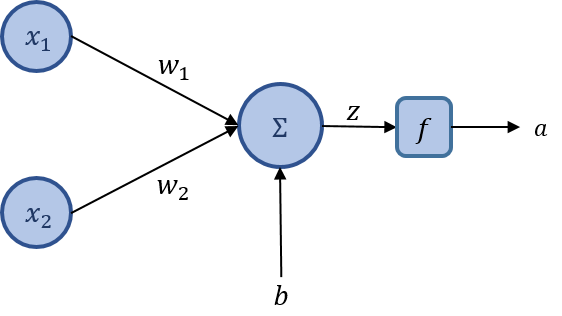

In [2]:
np.random.seed(seed=100)

# input data(x1, x2)
X = np.array([1, 2])
# target data(y)
Y = 1

# initialize weights(W) with random values
# 2 for weights(w1, w2) and 1 for bias(b)
W = np.random.normal(size=2+1)
print('[w1, w2, b] :', W)

[w1, w2, b] : [-1.74976547  0.3426804   1.1530358 ]


In [3]:
# append 1 for bias
print ('before: X = ', X)
X = np.insert(X, 2, 1)
print ('after: X = ', X)

z = W.T.dot(X)
print('z :', z)

# activation function (sigmoid function)
a = 1/(np.exp(-z)+1)

print('output(a) :', a,
      '\ntarget(y) :', Y)

before: X =  [1 2]
after: X =  [1 2 1]
z : 0.08863113616395091
output(a) : 0.5221432904270034 
target(y) : 1


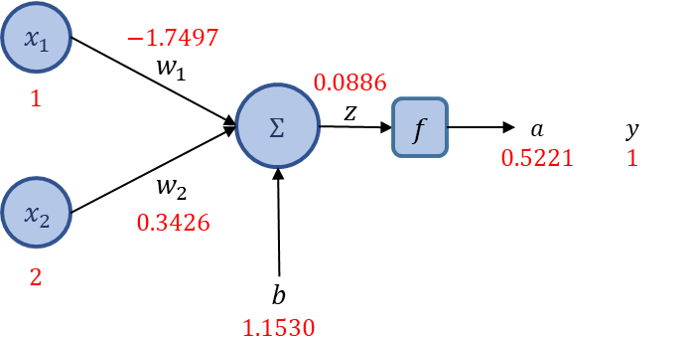

역전파 (Backpropagation)

In [4]:
# define error
e = Y - a

# define learning rate
lr = 1

# update weights(w1, w2) and bias(b)
W = W + lr*e*X*a*(1-a)

print('[w1, w2, b] :', W)

[w1, w2, b] : [-1.6305356   0.58114015  1.27226567]


업데이트 결과 확인

In [5]:
z = W.T.dot(X)
print('z :', z)

# activation function (sigmoid function)
a = 1/(np.exp(-z)+1)

print('output(a) :', a,
      '\ntarget(y) :', Y)

z : 0.8040103690852245
output(a) : 0.6908316837376427 
target(y) : 1


Class 형태로 구현

In [6]:
class single_perceptron(object):
  def __init__(self, size):
    self.W = np.random.normal(size=size+1)

  def sigmoid(self, x):
      return 1/(np.exp(-x)+1)

  def predict(self, x):
    x = np.insert(x, 0, 1)
    z = self.W.T.dot(x)
    a = self.sigmoid(z)
    return a

  def train(self, X, Y, lr=0.5, epochs=10):
    for epoch in range(epochs):
      for i in range(Y.shape[0]):
        y = self.predict(X[i])
        e = Y[i] - y
        self.W = self.W + lr * np.insert(X[i], 0, 1) * e * y*(1-y)
        if (Y.shape[0]*epoch+i+1) % 200 == 0:
          print('Step :', Y.shape[0]*epoch+i+1, '\tLoss :', abs(e))
    print('Train Finished.')

In [7]:
# training data (AND gate example)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([0, 0, 0, 1])

In [8]:
# define a perceptron
perceptron = single_perceptron(size=X.shape[1])

# train with data
perceptron.train(X=X, Y=Y, lr=1, epochs=500)

Step : 200 	Loss : 0.30861590663471405
Step : 400 	Loss : 0.22591722475259168
Step : 600 	Loss : 0.18378361124594844
Step : 800 	Loss : 0.15770931892924833
Step : 1000 	Loss : 0.1397441322449443
Step : 1200 	Loss : 0.12648486945338522
Step : 1400 	Loss : 0.11622042381495834
Step : 1600 	Loss : 0.10799138803357933
Step : 1800 	Loss : 0.10121551666086981
Step : 2000 	Loss : 0.09551754199598694
Train Finished.


In [9]:
# check updated weights
print(perceptron.W)

# predict with updated weights
for x in X:
  print(perceptron.predict(x), end=' ')

[-7.15213186  4.71614643  4.70879483]
0.0007825797362866295 0.0799271669303054 0.08046946738910232 0.9065999501687377 

In [10]:
# training data (XOR gate example)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([0, 1, 1, 0])

perceptron = single_perceptron(size=X.shape[1])
perceptron.train(X=X, Y=Y, lr=1, epochs=500)

for x in X:
  print(perceptron.predict(x), end=' ')

Step : 200 	Loss : 0.5227839329604674
Step : 400 	Loss : 0.5312406275725687
Step : 600 	Loss : 0.5327928299856437
Step : 800 	Loss : 0.5330672802682467
Step : 1000 	Loss : 0.5331153316858522
Step : 1200 	Loss : 0.5331237259671533
Step : 1400 	Loss : 0.5331251915848562
Step : 1600 	Loss : 0.5331254474382598
Step : 1800 	Loss : 0.5331254921006007
Step : 2000 	Loss : 0.5331254998968419
Train Finished.
0.5331255039460879 0.5000000004831 0.46687449898827726 0.4340385133895854 

In [11]:
### CHALLENGE : activation function을 tanh function으로 구현해보기

class single_perceptron(object):
  def __init__(self, size):
    self.W = np.random.normal(size=size+1)

  def sigmoid(self, x):
      return 1/(np.exp(-x)+1)

  def predict(self, x):
    x = np.insert(x, 0, 1)
    z = self.W.T.dot(x)
    a = self.sigmoid(z)
    return a

  def train(self, X, Y, lr=0.5, epochs=10):
    for epoch in range(epochs):
      for i in range(Y.shape[0]):
        y = self.predict(X[i])
        e = Y[i] - y
        self.W = self.W + lr * np.insert(X[i], 0, 1) * e * y*(1-y)
        if (Y.shape[0]*epoch+i+1) % 200 == 0:
          print('Step :', Y.shape[0]*epoch+i+1, '\tLoss :', abs(e))
    print('Train Finished.')

Keras를 이용하여 구현

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [13]:
# training data (AND gate example)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([0, 0, 0, 1])

In [14]:
# train model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=1.0))

model.fit(X, Y, epochs=500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - loss: 0.2895
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2802
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2714
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2631
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2554
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2482
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2414
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2351
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2291
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2233
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2179
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2126
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2075
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2026
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1979
Epoch 16/500
1/1 ━

In [15]:
# predict with updated model
print(model.predict(X)[:,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[0.00319347 0.12080867 0.1208041  0.85493153]


##2. 다층 퍼셉트론 (Multi-layer Perceptron)

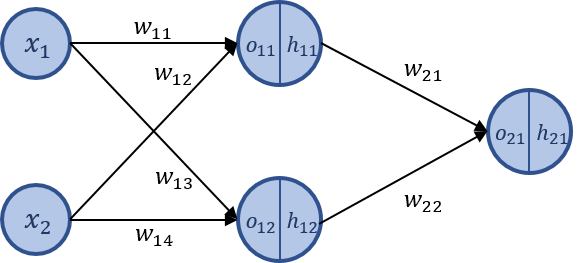

In [16]:
# training data (XOR gate example)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([0, 1, 1, 0])

In [17]:
# train model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=2.0))

model.fit(X, Y, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 0.2508
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2505
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2503
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2502
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2502
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2502
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2501
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2501
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2501
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2501
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2501
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2501
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2501
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2501
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2501
Epoch 16/500
1/1 ━

In [18]:
# predict with updated model
print(model.predict(X)[:,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
[0.12153583 0.84359694 0.5006946  0.534299  ]
